In [1]:
# 구글 드라이브의 파일 연동
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# 코랩에서 접근하고 싶은 파일들을 먼저 압축하고
# 구글 드라이브에 업로드 한 후
# 코랩과 구글 드라이브를 연동시키고
# 현재 화면의 좌측 부분의 파일 아이콘을 선택하여
# 해당 파일을 찾아 우클릭 하고 경로 복사 후 압축 해제
# !unzip "/content/drive/MyDrive/open.zip"

In [3]:
# 사용 가능한 GPU 확인
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

# GPU 사용 설정
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 649135650301553946
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6170959872
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8434610667664105110
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [4]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), os.path.pardir, 'functions'))
from predict_and_test import get_test_csv_fn

from datetime import datetime
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense

In [5]:
# ========= 코드 그대로 모델 생성하고 학습시켜보기 =========
# https://techblog-history-younghunjo1.tistory.com/261

# keras의 ImageDataGenerator 객체 및 flow_from_directory() 함수 사용 + 이미지 전처리 옵션 설정

# 데이콘 리더 보드 점수 => 5회 학습 시 0.0887985251
# 20회 학습 진행 시 모든 테스트 사진에 대하여 오타공으로 판단하여 제출하지 않음

# TRAIN_FOLDER_PATH = '/content/train/'
TRAIN_FOLDER_PATH = '../../open/train/'
OPEN_FOLDER_PATH = '../../open/'

EPOCHS = 5
RESIZED_WIDTH = 224
RESIZED_HEIGHT = 224

train_img_generator = ImageDataGenerator(rotation_range=30, width_shift_range=0.3, shear_range=0.3, horizontal_flip = True, vertical_flip = True, rescale=1/255.)
train_img_flow = train_img_generator.flow_from_directory(
    TRAIN_FOLDER_PATH, target_size=(RESIZED_WIDTH, RESIZED_HEIGHT))

# 109
print(len(train_img_flow))

# for img in train_img_flow:
#     print('img :', img)

def create_model_fn():

    input_tensor = Input(shape=(RESIZED_WIDTH, RESIZED_HEIGHT, 3))

    pretrained_model = Xception(
        input_tensor=input_tensor, include_top=False, weights='imagenet')
    pretrained_output = pretrained_model.output

    x = GlobalAveragePooling2D()(pretrained_output)
    x = Dense(units=128, activation='relu')(x)
    output = Dense(units=19, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=output)
    model.summary()
    return model

model = create_model_fn()
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy', metrics=['acc'])

train_history = model.fit(train_img_flow, epochs=EPOCHS)
loss = train_history.history['loss']
print('loss :', loss)

# 연월일_시간
now = datetime.today().strftime('%Y%m%d_%H%M%S')
model.save(f'model_{now}.h5')

# ========================================================


Found 3457 images belonging to 19 classes.
109
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )              

  0%|          | 0/792 [00:00<?, ?it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 1/792 [00:00<08:15,  1.59it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████| 792/792 [00:14<00:00, 54.41it/s]


normalized_test_image_tensor.shape : (792, 224, 224, 3)
25/25 [==============================] - 2s 93ms/step
predicted_result.shape : (792, 19)
predicted_labels : ['오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '오염', '

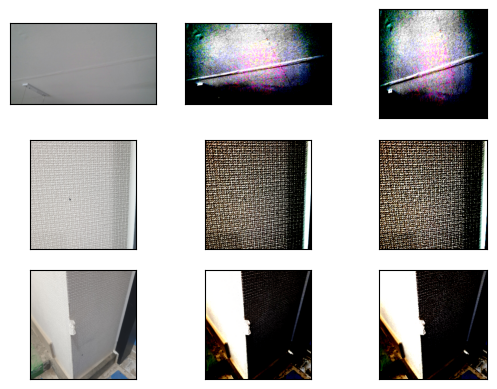

In [8]:
# 모두 한 가지로만 예측함
# from predict_and_test import get_predict_result_fn
# predicted_result = get_predict_result_fn(RESIZED_WIDTH, RESIZED_HEIGHT, model)
# get_test_csv_fn(predicted_result)

In [7]:
# ImageDataGenerator 객체를 사용한 테스트 진행 (추후 보완한 코드)
test_img_generator = ImageDataGenerator(rescale=1/255.)
test_img_flow = test_img_generator.flow_from_directory(
    OPEN_FOLDER_PATH, classes=['test'], class_mode=None, shuffle=False, target_size=(RESIZED_WIDTH, RESIZED_HEIGHT))

predicted_result = model.predict(test_img_flow)
get_test_csv_fn(predicted_result)

Found 792 images belonging to 1 classes.
25/25 [==============================] - 12s 447ms/step
predicted_labels : ['훼손', '오염', '훼손', '오염', '훼손', '훼손', '오염', '오염', '훼손', '오타공', '훼손', '훼손', '오염', '오염', '훼손', '훼손', '훼손', '걸레받이수정', '오염', '오염', '창틀,문틀수정', '훼손', '오염', '면불량', '꼬임', '오염', '터짐', '들뜸', '훼손', '훼손', '오염', '훼손', '훼손', '오염', '곰팡이', '훼손', '훼손', '훼손', '오타공', '훼손', '훼손', '훼손', '터짐', '면불량', '훼손', '훼손', '오염', '훼손', '훼손', '오염', '오염', '오염', '오염', '훼손', '훼손', '훼손', '훼손', '훼손', '오염', '오염', '오타공', '몰딩수정', '훼손', '오염', '훼손', '훼손', '오염', '오염', '훼손', '면불량', '오염', '오염', '훼손', '터짐', '오타공', '훼손', '훼손', '오염', '훼손', '오염', '오염', '훼손', '훼손', '오타공', '훼손', '오타공', '훼손', '면불량', '오염', '훼손', '오염', '훼손', '훼손', '오염', '훼손', '훼손', '훼손', '오염', '오타공', '오염', '석고수정', '훼손', '훼손', '터짐', '오타공', '오염', '훼손', '훼손', '훼손', '훼손', '오염', '훼손', '훼손', '훼손', '훼손', '오염', '훼손', '훼손', '오염', '훼손', '훼손', '훼손', '오염', '면불량', '훼손', '훼손', '훼손', '훼손', '훼손', '오염', '훼손', '오염', '꼬임', '오염', '훼손', '오염', '면불량', '훼손', '훼손', '오염', '오타공', '훼손', '훼